# Toxic

In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xticks
%matplotlib inline

In [3]:
def evaluate(y_true, y_pred_proba, debug=False):
    max_threshold = -1
    max_f1 = 0
    max_recall = 0
    max_precision = 0
    mac_acc = 0

    for THRESHOLD in range(50, 51):
#     for THRESHOLD in range(0, 100):
        THRESHOLD = THRESHOLD/100
        y_pred_thr = [1 if x>=THRESHOLD else 0 for x in y_pred_proba]
        f1 = f1_score(y_true, y_pred_thr, average='macro')
        recall = recall_score(y_true, y_pred_thr)
        precision = precision_score(y_true, y_pred_thr)
        acc = accuracy_score(y_true, y_pred_thr)
        
        if debug:
            print("THRESHOLD: {:.3f} \tF1: {:.8f} \tRecall: {:.8f} \tPrecision: {:.8f}".format(THRESHOLD, 
                                                                                               f1, 
                                                                                               recall, 
                                                                                               precision))

        if f1>max_f1:
            max_f1 = f1
            max_recall = recall
            max_precision = precision
            mac_acc = acc
            max_threshold = THRESHOLD
            
    print("##MAX## \nTHRESHOLD: {:.3f} \tF1: {:.8f} \tRecall: {:.8f} \tPrec: {:.8f} \tAcc: {:.8f}".format(max_threshold,
                                                                                                         max_f1, 
                                                                                                         max_recall, 
                                                                                                         max_precision,
                                                                                                         mac_acc))
    return max_f1, max_recall, max_precision, mac_acc

In [4]:
import pandas as pd

In [5]:
TOTAL_DATA = 11852
type_list = ['A', 'B', 'C']
type_C_mult = [0.5, 1, 1.5, 2, 3]
result_list = []

for EXPERIMENT_TYPE in type_list:
    for mult in type_C_mult:
        print("Result: type {} mult {}".format(EXPERIMENT_TYPE, mult))
        data = pd.read_csv('result_toxic_toxic_XLM_R_{}_11852_{}_full.csv'.format(EXPERIMENT_TYPE, mult))
        max_f1, max_recall, max_precision, max_acc = evaluate(data.y_true.values, data.y_pred.values, debug=False)
        
        if EXPERIMENT_TYPE == 'A':
            mult = 0
        if EXPERIMENT_TYPE == 'B':
            mult = -1
            
            
        result_list.append({
            'tipe': EXPERIMENT_TYPE,
            'total_data': TOTAL_DATA, 
            'foreign_mult': mult,
            'total_foreign_data':int(TOTAL_DATA*mult) if EXPERIMENT_TYPE=='C' else 0,
            'max_f1': max_f1,
            'max_recall': max_recall,
            'max_precision': max_precision,
            'max_accuracy': max_acc
        })
        
        if EXPERIMENT_TYPE != 'C':
            break

Result: type A mult 0.5
##MAX## 
THRESHOLD: 0.500 	F1: 0.86856470 	Recall: 0.85499316 	Prec: 0.90448625 	Acc: 0.86940015
Result: type B mult 0.5
##MAX## 
THRESHOLD: 0.500 	F1: 0.52099520 	Recall: 0.85772914 	Prec: 0.58652947 	Acc: 0.58542141
Result: type C mult 0.5
##MAX## 
THRESHOLD: 0.500 	F1: 0.86951783 	Recall: 0.92065663 	Prec: 0.85951469 	Acc: 0.87243736
Result: type C mult 1
##MAX## 
THRESHOLD: 0.500 	F1: 0.88810145 	Recall: 0.88782490 	Prec: 0.91023843 	Acc: 0.88914199
Result: type C mult 1.5
##MAX## 
THRESHOLD: 0.500 	F1: 0.88285432 	Recall: 0.87824897 	Prec: 0.90934844 	Acc: 0.88382688
Result: type C mult 2
##MAX## 
THRESHOLD: 0.500 	F1: 0.89151565 	Recall: 0.87414501 	Prec: 0.92743106 	Acc: 0.89217920
Result: type C mult 3
##MAX## 
THRESHOLD: 0.500 	F1: 0.89840350 	Recall: 0.87961696 	Prec: 0.93459302 	Acc: 0.89901291


In [6]:
final_result = pd.DataFrame(result_list) 
final_result.to_csv('final_{}_{}_{}_result_combined_{}.csv'.format('toxic',
                                                                   'toxic',
                                                                   'xlm_r',
                                                                   TOTAL_DATA),
                    index=False)
    
print(final_result.shape)
final_result.head()

(7, 8)


,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision,max_accuracy
0,A,11852,0.0,0,0.868565,0.854993,0.904486,0.869400
1,B,11852,-1.0,0,0.520995,0.857729,0.586529,0.585421
2,C,11852,0.5,5926,0.869518,0.920657,0.859515,0.872437
3,C,11852,1.0,11852,0.888101,0.887825,0.910238,0.889142
4,C,11852,1.5,17778,0.882854,0.878249,0.909348,0.883827


In [7]:
data = pd.read_csv('final_toxic_toxic_xlm_r_result_combined_11852.csv')
data = data.sort_values(by=['foreign_mult'])
data.head()

,tipe,total_data,foreign_mult,total_foreign_data,max_f1,max_recall,max_precision,max_accuracy
1,B,11852,-1.0,0,0.520995,0.857729,0.586529,0.585421
0,A,11852,0.0,0,0.868565,0.854993,0.904486,0.869400
2,C,11852,0.5,5926,0.869518,0.920657,0.859515,0.872437
3,C,11852,1.0,11852,0.888101,0.887825,0.910238,0.889142
4,C,11852,1.5,17778,0.882854,0.878249,0.909348,0.883827


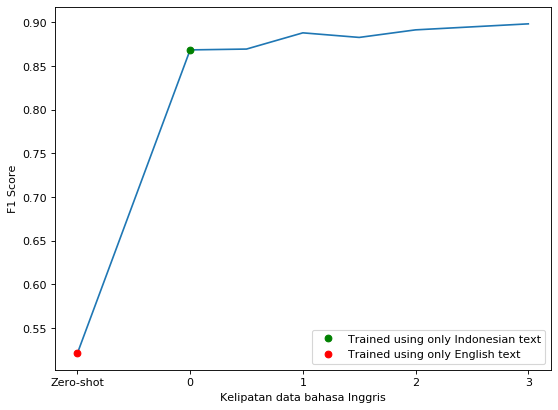

In [8]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(data[(data['total_data'] == 11852 )].foreign_mult.values, data[(data['total_data'] == 11852)].max_f1.values)
    
plt.plot(data[(data['tipe'] == 'A' )].foreign_mult.values,
data[(data['tipe'] == 'A')].max_f1.values,
'go',
label='Trained using only Indonesian text')

plt.plot(data[(data['tipe'] == 'B' )].foreign_mult.values,
data[(data['tipe'] == 'B')].max_f1.values,
'ro',
label='Trained using only English text')

xticks([-1, 0, 1, 2, 3], ['Zero-shot', 0, 1, 2, 3])

plt.legend(loc="lower right")
plt.xlabel('Kelipatan data bahasa Inggris')
plt.ylabel('F1 Score')
plt.title('')
plt.savefig('plot.png')
plt.show()